# **Data Pre-processing**

## **Import Libraries**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Dataset**

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Global.csv')
data = pd.read_csv('/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/Global.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,144379.0,3:URLLC,Benign
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,181691.0,3:URLLC,Benign
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,175580.0,3:URLLC,Benign
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,120239.0,3:URLLC,Benign
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,348612.0,3:URLLC,Benign


In [5]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC,Malicious


## **Class Distribution Analysis Before Data Cleaning**

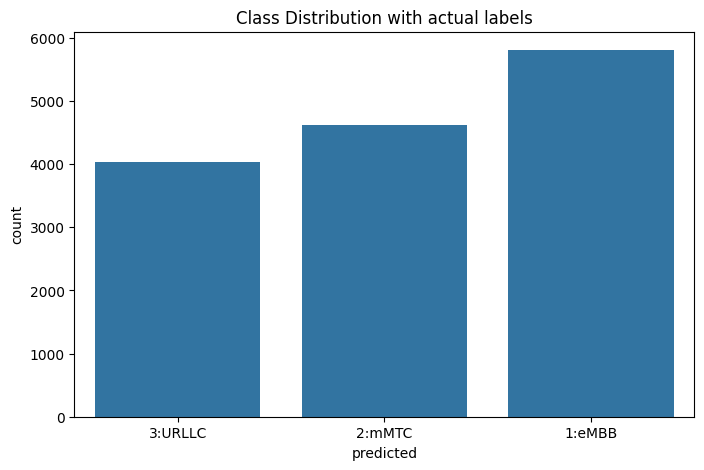

In [6]:
# Class Distribution Analysis before cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Data Cleaning**

In [7]:
# Function to check if a value can be converted to a numeric value
def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Check for non-numeric values in each column
non_numeric_columns = []
for column in data.columns:
    if not all(data[column].apply(is_numeric)):
        non_numeric_columns.append(column)

# Print columns with non-numeric values
if non_numeric_columns:
    print("Columns with non-numeric values:", non_numeric_columns)
else:
    print("All columns contain numeric values.")

Columns with non-numeric values: ['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'predicted', 'Label']


In [8]:
data = data.drop(columns=['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'Label'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


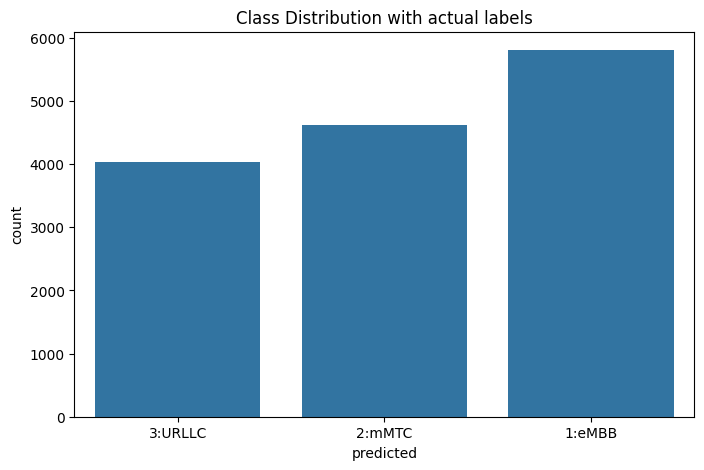

In [9]:
# Class Distribution Analysis after removing non-numeric columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

In [10]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                 0
Seq               0
Dur               0
RunTime           0
Mean              0
Sum               0
Min               0
Max               0
sTos              1
dTos           3887
sTtl              1
dTtl           3923
sHops             1
dHops          3899
TotPkts           0
SrcPkts           0
DstPkts           0
TotBytes          0
SrcBytes          0
DstBytes          0
Offset            0
sMeanPktSz        0
dMeanPktSz        0
Load              0
SrcLoad           0
DstLoad           0
Loss              0
SrcLoss           0
DstLoss           0
pLoss             0
SrcGap         3113
DstGap         3113
Rate              0
SrcRate           0
DstRate           0
SrcWin         3230
DstWin         4243
sVid          14082
dVid          14452
SrcTCPBase     3113
DstTCPBase     4384
TcpRtt            0
SynAck            0
AckDat            0
UniqueID          0
predicted         0
dtype: int64


In [11]:
data = data.drop(columns=['sVid', 'dVid'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


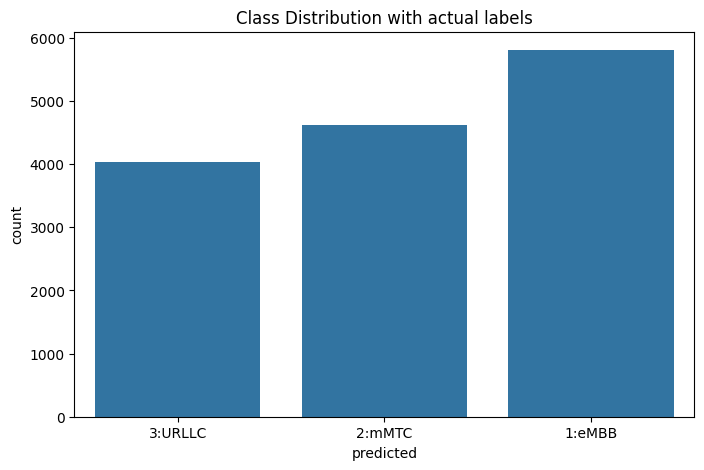

In [12]:
# Class Distribution Analysis after removing empty columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

In [13]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                0
Seq              0
Dur              0
RunTime          0
Mean             0
Sum              0
Min              0
Max              0
sTos             1
dTos          3887
sTtl             1
dTtl          3923
sHops            1
dHops         3899
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
SrcGap        3113
DstGap        3113
Rate             0
SrcRate          0
DstRate          0
SrcWin        3230
DstWin        4243
SrcTCPBase    3113
DstTCPBase    4384
TcpRtt           0
SynAck           0
AckDat           0
UniqueID         0
predicted        0
dtype: int64


In [14]:
# Create a dictionary for columns with missing values
columns_with_missing = {}

# Iterate through the dictionary of missing values
for column, count in missing_values.items():
    columns_with_missing[column] = count

# Print the dictionary
print(columns_with_missing)

{'X': 0, 'Seq': 0, 'Dur': 0, 'RunTime': 0, 'Mean': 0, 'Sum': 0, 'Min': 0, 'Max': 0, 'sTos': 1, 'dTos': 3887, 'sTtl': 1, 'dTtl': 3923, 'sHops': 1, 'dHops': 3899, 'TotPkts': 0, 'SrcPkts': 0, 'DstPkts': 0, 'TotBytes': 0, 'SrcBytes': 0, 'DstBytes': 0, 'Offset': 0, 'sMeanPktSz': 0, 'dMeanPktSz': 0, 'Load': 0, 'SrcLoad': 0, 'DstLoad': 0, 'Loss': 0, 'SrcLoss': 0, 'DstLoss': 0, 'pLoss': 0, 'SrcGap': 3113, 'DstGap': 3113, 'Rate': 0, 'SrcRate': 0, 'DstRate': 0, 'SrcWin': 3230, 'DstWin': 4243, 'SrcTCPBase': 3113, 'DstTCPBase': 4384, 'TcpRtt': 0, 'SynAck': 0, 'AckDat': 0, 'UniqueID': 0, 'predicted': 0}


In [15]:
# Create a dictionary for columns with missing values
filtered_columns_with_missing = {}

# Filter out columns with non-zero missing value counts
for column, count in missing_values.items():
    if count != 0 and count > 10:
      filtered_columns_with_missing[column] = count

# Print the filtered dictionary
print(filtered_columns_with_missing)

{'dTos': 3887, 'dTtl': 3923, 'dHops': 3899, 'SrcGap': 3113, 'DstGap': 3113, 'SrcWin': 3230, 'DstWin': 4243, 'SrcTCPBase': 3113, 'DstTCPBase': 4384}


In [16]:
for column, count in filtered_columns_with_missing.items():
  print(data[column].unique(), "\n\n",data[column].value_counts(dropna=False), "\n\n\n")

[184.  nan   0. 186.  48.  40.] 

 0.0      10552
NaN       3887
186.0       10
184.0        4
40.0         2
48.0         1
Name: dTos, dtype: int64 



[255.  nan 117.  64. 116.  62.  53.  63.  52. 252. 250.  59.  47.  54.] 

 59.0     6924
NaN      3923
117.0    1933
64.0      896
116.0     413
53.0      303
62.0       16
255.0      12
63.0       11
54.0        8
52.0        7
47.0        6
252.0       2
250.0       2
Name: dTtl, dtype: int64 



[ 1. nan 11.  0. 12.  2.  4.  6.  5. 17. 10.] 

 5.0     6564
NaN     3899
11.0    2452
0.0      896
1.0      431
12.0     180
2.0       16
10.0       8
17.0       6
4.0        2
6.0        2
Name: dHops, dtype: int64 



[nan  0.] 

 0.0    11343
NaN     3113
Name: SrcGap, dtype: int64 



[nan  0.] 

 0.0    11343
NaN     3113
Name: DstGap, dtype: int64 



[         nan 1.635000e+03 3.355392e+07 6.809600e+04 9.779200e+04
 1.751000e+03 4.094000e+03 8.294400e+04 3.706880e+06 2.610000e+02
 1.677696e+07 1.800000e+02 1.304064e+06 7.577600e+04

In [17]:
data = data.dropna()
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
40,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05,3:URLLC
134,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05,3:URLLC
174,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05,3:URLLC
237,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05,3:URLLC
242,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


In [18]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          0
dTos          0
sTtl          0
dTtl          0
sHops         0
dHops         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
SrcGap        0
DstGap        0
Rate          0
SrcRate       0
DstRate       0
SrcWin        0
DstWin        0
SrcTCPBase    0
DstTCPBase    0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
predicted     0
dtype: int64


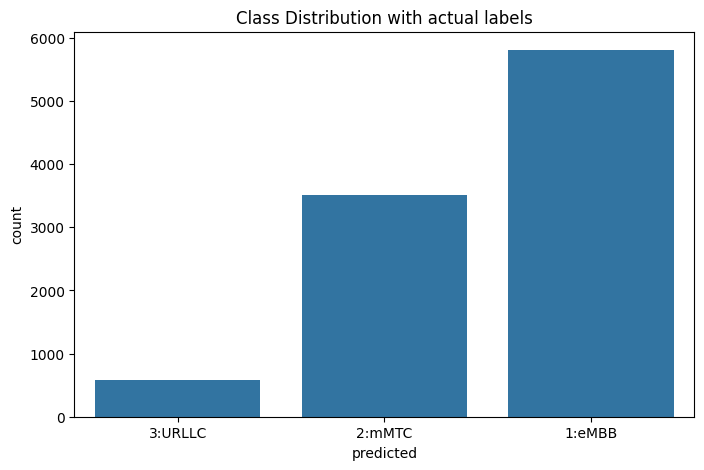

In [19]:
# Class Distribution Analysis after removing empty rows
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Class Distribution Analysis After Data Cleaning**

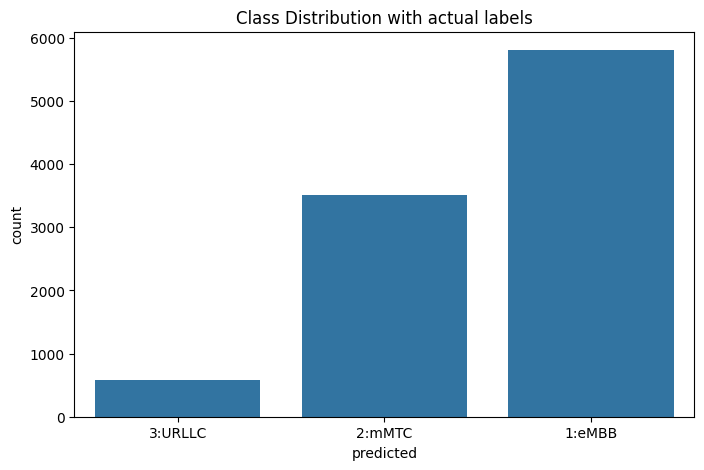

In [21]:
# Class Distribution Analysis after Data Cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

## Heatmaps

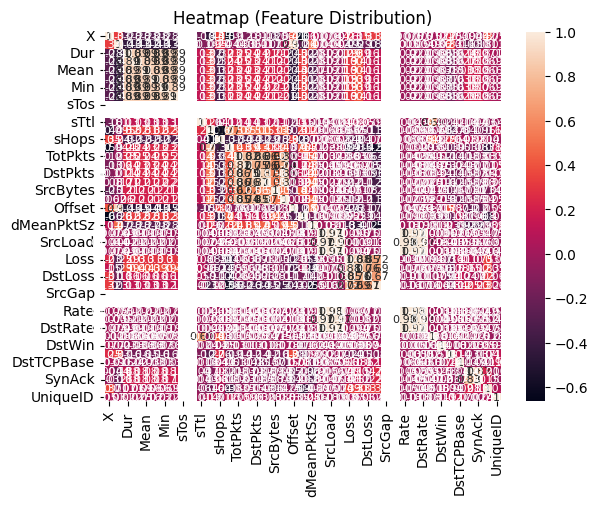

In [23]:
# Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

# **Define X and y**

In [25]:
X = data.drop(columns=['predicted'])
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
40,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
134,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
174,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
237,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
242,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [26]:
y = data['predicted']
y

40       3:URLLC
134      3:URLLC
174      3:URLLC
237      3:URLLC
242      3:URLLC
          ...   
14451     2:mMTC
14452     2:mMTC
14453     2:mMTC
14454     2:mMTC
14455     2:mMTC
Name: predicted, Length: 9900, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
14309,664063.816584,2333.956002,1.909499,1.906140,1.904911,1.903984,1.904292,1.905542,0.0,0.0,...,1.576117,2.099850,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014995,0.001868,0.014342,2.164800e+06
11051,447462.160284,1324.999374,2.992250,1.956493,3.280499,2.137423,2.731039,2.663139,0.0,0.0,...,1.891107,1.648011,64256.0,65024.0,2.043686e+09,1.618366e+09,0.151935,0.133785,0.027020,1.028606e+06
6432,236063.418954,8202.246354,4.737295,4.477248,4.835465,4.591553,4.862110,3.644770,0.0,0.0,...,6.307335,29.118550,56960.0,64768.0,8.507672e+08,5.466176e+08,0.047971,0.020919,0.026403,1.098296e+06
14306,664062.237907,2329.564234,1.913800,1.912304,1.913908,1.913048,1.912570,1.914645,0.0,0.0,...,1.567791,2.091048,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014001,0.001637,0.012520,2.364825e+06
5770,119646.416871,5487.642188,4.935297,3.721782,3.651930,4.663535,4.554954,4.704071,0.0,0.0,...,10.956757,29.675869,56960.0,64896.0,8.507672e+08,5.466176e+08,0.043624,0.020918,0.025331,7.481369e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,637842.392373,25324.347257,0.323884,0.336725,0.325118,0.310569,0.338634,0.300003,0.0,0.0,...,28.170875,27.412806,56704.0,64896.0,2.542816e+09,3.847444e+09,0.018744,0.007810,0.027104,1.350396e+06
8691,621174.080519,18814.644336,0.249412,0.258637,0.311403,0.341875,0.244438,0.297379,0.0,0.0,...,21.678560,26.217586,56448.0,64768.0,1.845250e+09,4.388114e+08,0.021797,0.002245,0.020035,1.278613e+06
8890,613094.503112,17298.677915,0.356897,0.532837,0.374227,0.545199,0.484583,0.700138,0.0,0.0,...,22.229216,18.815246,56192.0,64768.0,1.903045e+09,5.429505e+08,0.030092,0.001415,0.029700,1.156060e+06
4360,526086.000000,5976.000000,1.047937,1.047937,1.047937,1.047937,1.047937,1.047937,0.0,0.0,...,0.954256,0.954256,512.0,64240.0,7.061805e+08,2.905999e+09,0.002085,0.002085,0.000000,2.207923e+06


In [28]:
X_test

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
12760,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,1.771186,1.346425,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05
9180,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,33.262600,38.289493,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06
8267,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,34.998405,50.872519,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05
13630,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,1.750682,2.250765,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06
4089,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,4.000331,3.000248,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13016,664611.336644,2619.439858,1.866206,1.883590,1.868661,1.881472,1.863862,1.867791,0.0,0.0,...,1.598268,2.140264,64128.0,65024.0,4.218550e+08,1.770455e+09,0.017556,0.001885,0.019715,3.526948e+05
13555,455234.910255,194.612521,3.891595,3.613938,3.326338,3.337980,3.980882,3.215810,0.0,0.0,...,2.306333,1.497726,64256.0,64896.0,6.010938e+08,3.265196e+09,1.001778,0.405318,0.026356,1.272696e+06
4053,34817.000000,7.000000,4.498744,4.498744,4.498744,4.498744,4.498744,4.498744,0.0,0.0,...,4.223401,6.223959,4094.0,5549.0,1.093752e+09,3.441352e+09,0.000000,0.000000,0.000000,9.435900e+04
9063,636911.618669,25259.810066,0.204607,0.219529,0.187462,0.190487,0.218758,0.207756,0.0,0.0,...,38.116638,44.712333,56704.0,64896.0,2.542816e+09,3.847444e+09,0.019125,0.001697,0.017450,2.071909e+06


In [29]:
y_train

14309    2:mMTC
11051    2:mMTC
6432     1:eMBB
14306    2:mMTC
5770     1:eMBB
          ...  
9234     1:eMBB
8691     1:eMBB
8890     1:eMBB
4360     2:mMTC
11058    2:mMTC
Name: predicted, Length: 8910, dtype: object

In [30]:
y_test

12760    2:mMTC
9180     1:eMBB
8267     1:eMBB
13630    2:mMTC
4089     2:mMTC
          ...  
13016    2:mMTC
13555    2:mMTC
4053     2:mMTC
9063     1:eMBB
6934     1:eMBB
Name: predicted, Length: 990, dtype: object

# **RANDOM FOREST CLASSIFIER**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred_RFC = model_RFC.predict(X_test)

In [48]:
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy_RFC:.2f}")

Accuracy: 1.00


In [49]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

      1:eMBB       1.00      1.00      1.00       589
      2:mMTC       0.99      1.00      1.00       328
     3:URLLC       1.00      0.97      0.99        73

    accuracy                           1.00       990
   macro avg       1.00      0.99      0.99       990
weighted avg       1.00      1.00      1.00       990



In [50]:
print(confusion_matrix(y_test, y_pred_RFC))

[[588   1   0]
 [  0 328   0]
 [  1   1  71]]


print(confusion_matrix(y_test, y_pred_LR))

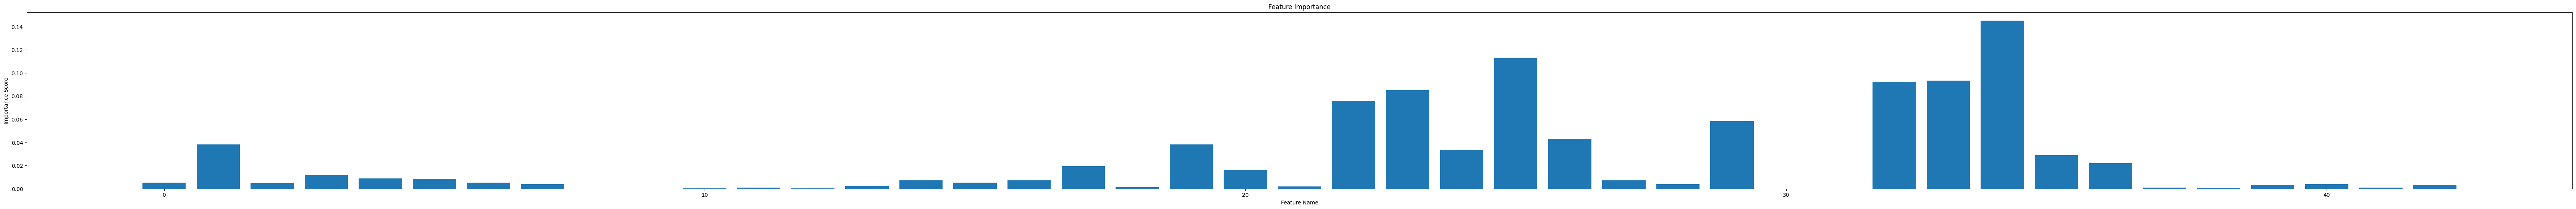

In [51]:
# Feature Importance
feature_importance = model_RFC.feature_importances_
features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(feature_importance), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.show()

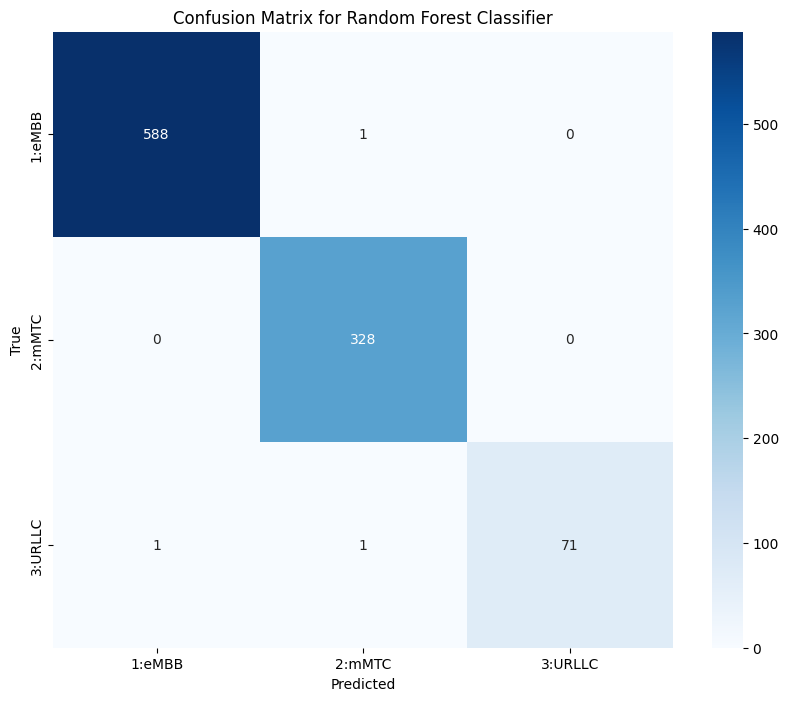

In [52]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [53]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_RFC = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_RFC = X_test_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_RFC.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_RFC = pd.Series(y_pred_RFC, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_RFC['Actual_Slice_Type'] = y_test
X_test_with_predictions_RFC['Predicted_Slice_Type'] = y_pred_RFC

In [54]:
X_test_column_names

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'sTos',
 'dTos',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID']

In [55]:
X_test_with_predictions_RFC.head(20)

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,Actual_Slice_Type,Predicted_Slice_Type
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,2:mMTC,2:mMTC
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,1:eMBB,1:eMBB
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,1:eMBB,1:eMBB
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,2:mMTC,2:mMTC
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,2:mMTC,2:mMTC
5,637292.644821,26373.962141,3.973801,2.412318,1.728140,3.006734,3.773497,4.640954,0.0,0.0,...,56704.0,64640.0,3.025160e+09,2.052664e+09,0.030688,0.013300,0.015763,2.160506e+06,1:eMBB,1:eMBB
6,455164.409119,185.145517,3.459985,3.535328,3.330325,3.264566,3.698071,3.099247,0.0,0.0,...,64256.0,65024.0,3.958828e+09,9.675108e+08,0.033246,0.001336,0.035282,2.055851e+06,2:mMTC,2:mMTC
7,615909.297427,17998.017745,0.296050,0.346868,0.283271,0.331948,0.284098,0.300357,0.0,0.0,...,56832.0,64768.0,8.256066e+08,1.984643e+08,0.028447,0.001514,0.029245,2.206492e+06,1:eMBB,1:eMBB
8,38090.093865,7.000000,4.523248,4.582574,4.476724,4.543265,4.557378,4.559856,0.0,0.0,...,4094.0,5549.0,1.094831e+09,3.442058e+09,0.000000,0.000000,0.000000,2.186399e+06,2:mMTC,2:mMTC
9,455183.886427,208.639914,4.049667,3.764626,3.694967,3.998357,4.005673,3.795602,0.0,0.0,...,64256.0,64896.0,1.202037e+09,1.485176e+08,0.050970,0.001425,0.051342,2.358707e+06,2:mMTC,2:mMTC


In [56]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_RFC_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_RFC_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

NameError: name 'label_binarize' is not defined

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **SYNC NOTEBOOKS**

In [24]:
%cp '/content/drive/MyDrive/Colab Notebooks/NewDataset.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'